<a href="https://colab.research.google.com/github/gustavocardoza/Tarea-2/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [68]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [69]:
# Haga el cálculo aquí
mov_propio = 1 # Movimiento propio en unidades de [mas]/[yr]
distancia = 0.5 * 3.6*10**6 # Haciendo una conversión de unidades

t_final = distancia / mov_propio # Tiempo en años que tarda en cubrir una distancia de 0.5 grados.

t_final

# Un montón!

1800000.0

### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [71]:
path_archivo = '/content/drive/MyDrive/Módulo/ngc5694_pm.csv'

data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [72]:
# Muestra las columnas aquí
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [73]:
# Muestra el DataFrame aquí
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [74]:
pmra = data['pmra']
pmdec = data['pmdec']

pmra

,pmra
0,0.053134
1,-0.960711
2,0.674957
3,-0.057975
4,-0.438914
...,...
616,-0.269935
617,-0.962554
618,-0.796753
619,-0.901963


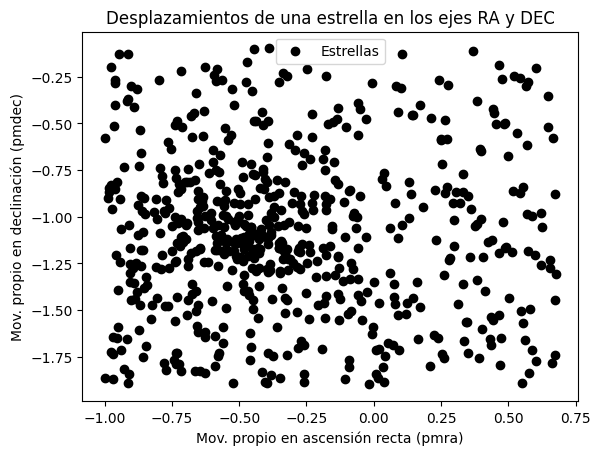

In [75]:
# Utilizamos la función plt.scatter para hacer el gráfico de dispersión.

# Gráfico de dispersión.
plt.scatter(pmra, pmdec, color = 'black', label = 'Estrellas')

# Título y ejes.
plt.title('Desplazamientos de una estrella en los ejes RA y DEC')
plt.xlabel('Mov. propio en ascensión recta (pmra)')
plt.ylabel('Mov. propio en declinación (pmdec)')

# Leyenda.
plt.legend()

# Mostrar gráfico.
plt.show()

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [76]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

mu_pmra, std_pmra, mu_pmdec, std_pmdec

(-0.3123486977209311,
 0.43823620785185174,
 -1.0897362576861138,
 0.42760876013101434)

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [77]:
from scipy.stats import norm

x_pmra = np.linspace(-1.5, 1, 300)
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)

x_pmdec = np.linspace(-2.5, 0.5, 300)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

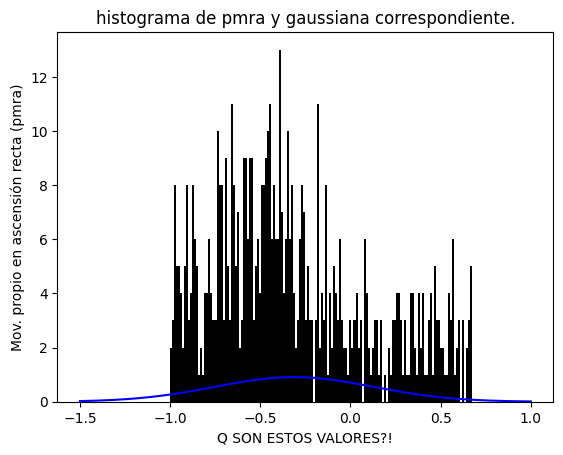

In [78]:
# Histograma de pmra
pmra.plot.hist(bins = 150, color = 'black')

# Gráfico gaussiana
plt.plot(x_pmra, fx_pmra, color = 'blue')

# Titulo y labels
plt.title('histograma de pmra y gaussiana correspondiente.')
plt.xlabel('Q SON ESTOS VALORES?!')
plt.ylabel('Mov. propio en ascensión recta (pmra)')

plt.show()

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

Text(0, 0.5, 'Eje Y')

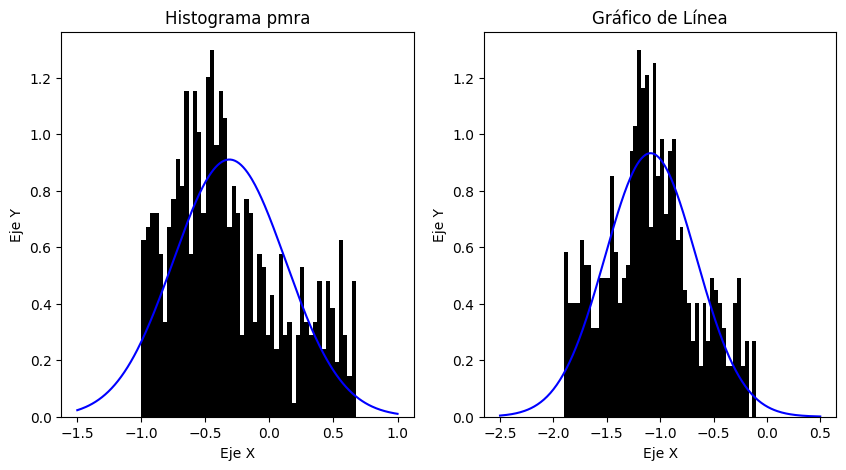

In [79]:
#
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#CORREGIR TITULOS

# Primer subplot:

# Histograma pmra
axs[0].hist(pmra, bins = 50, color = 'black', density = True)

# Gaussiana
axs[0].plot(x_pmra, fx_pmra, color = 'blue')

# Título y ejes
axs[0].set_title('Histograma pmra')
axs[0].set_xlabel('Eje X')
axs[0].set_ylabel('Eje Y')

# Segundo subplot:

# Histograma pmdec
axs[1].hist(pmdec, bins = 50, color = 'black', density = True)

# Gaussiana
axs[1].plot(x_pmdec, fx_pmdec, color = 'blue')

# Título y ejes
axs[1].set_title('Gráfico de Línea')
axs[1].set_xlabel('Eje X')
axs[1].set_ylabel('Eje Y')

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

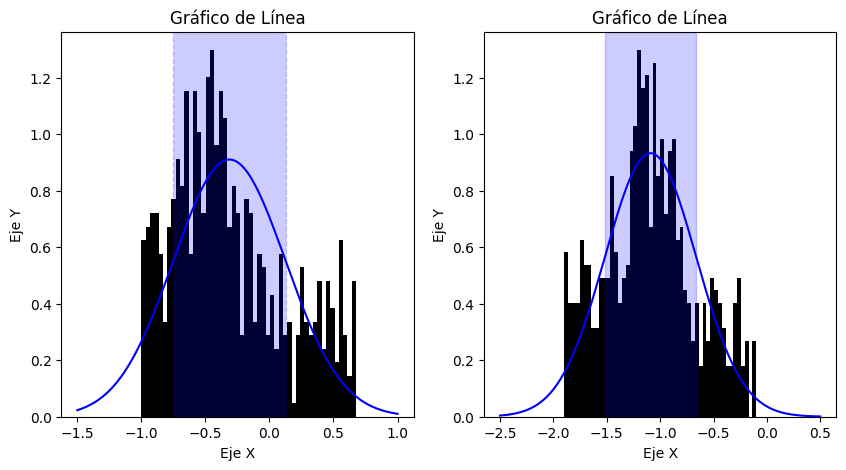

In [80]:
#
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#CORREGIR TITULOS

# Primer subplot:

# Histograma pmra
axs[0].hist(pmra, bins = 50, color = 'black', density = True)

# Gaussiana
axs[0].plot(x_pmra, fx_pmra, color = 'blue')

# Título y ejes
axs[0].set_title('Gráfico de Línea')
axs[0].set_xlabel('Eje X')
axs[0].set_ylabel('Eje Y')

#
axs[0].axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color = 'blue', alpha = 0.2, linestyle = '--')

# Segundo subplot:

# Histograma pmdec
axs[1].hist(pmdec, bins = 50, color = 'black', density = True)

# Gaussiana
axs[1].plot(x_pmdec, fx_pmdec, color = 'blue', label = 'Distribución Gaussiana')

# Título y ejes
axs[1].set_title('Gráfico de Línea')
axs[1].set_xlabel('Eje X')
axs[1].set_ylabel('Eje Y')

#
axs[1].axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color = 'blue', alpha = 0.2)

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:**  
Notemos que la estimación según las gaussianas

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [84]:
# Lea y muestre el DataFrame aquí

path = '/content/drive/MyDrive/Módulo/data_spectra.csv'

data1 = pd.read_csv(path)

data1

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:**  
A simple vista es posible reconocer tres líneas de emisión, todas cercanas al valor 15250 [cm**-1], entre ellas se puede ver una muy larga y dos relativamente cortas.

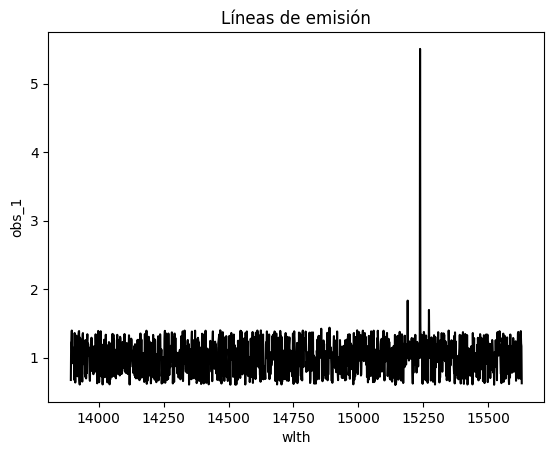

In [85]:
# Grafique aquí

# Obtención datos
obs_1 = data1['obs_1']
wlth = data1['Wlth']

# Gráfico
plt.plot(wlth, obs_1, color = 'black')

plt.title('Líneas de emisión')
plt.xlabel('wlth')
plt.ylabel('obs_1')

plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:**  
Para estimar el valor medio del ruido promediaremos todos los valores de la señal, ya que todos contienen ruido.

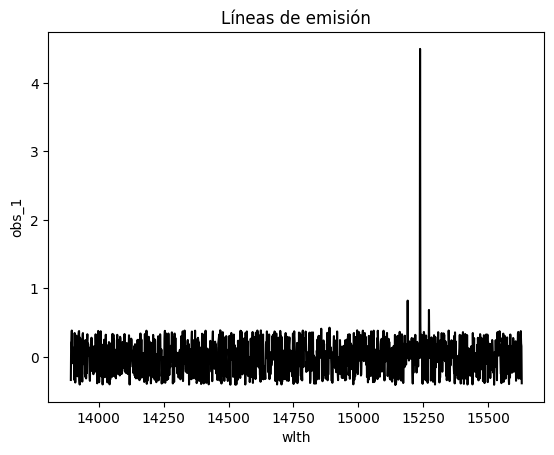

In [86]:
# Grafique el espectro centrado en 0 aquí

# Promedio
promedio_ruido = obs_1.mean()

# Gráfico
plt.plot(wlth, obs_1 - promedio_ruido, color = 'black')

plt.title('Líneas de emisión')
plt.xlabel('wlth')
plt.ylabel('obs_1')

plt.show()

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [87]:
# Media y desviación estandar de obs_1
desv_std_obs_1 = obs_1.std()
media_obs_1 = obs_1.mean()

# Limite superior e inferior del conjunto
margen_inf = media_obs_1 - 3*desv_std_obs_1
margen_sup = media_obs_1 + 3*desv_std_obs_1

# Finalmente, el subconjunto ruido es un conjunto filtrado de la columna obs_1 que cumple las condiciones de pertenecer al intervalo dado.
ruido = obs_1[(obs_1 >= margen_inf) & (obs_1 <= margen_sup)]

ruido

,obs_1
0,0.673065
1,1.218438
2,1.244496
3,1.395414
4,1.013531
...,...
1415,0.693123
1416,1.387281
1417,1.208096
1418,1.167845


2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

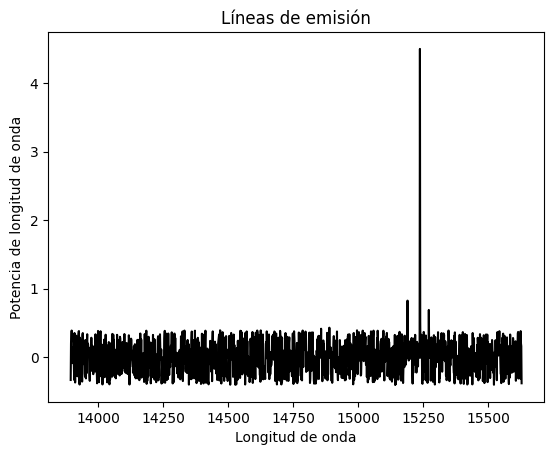

In [88]:
# Grafique el espectro centrado en 0 aquí

# Media del ruido
media_ruido = ruido.mean()

# Gráfico
plt.plot(wlth, obs_1 - media_ruido, color = 'black')

plt.title('Líneas de emisión')
plt.xlabel('Longitud de onda')
plt.ylabel('Potencia de longitud de onda')

plt.show()

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:**

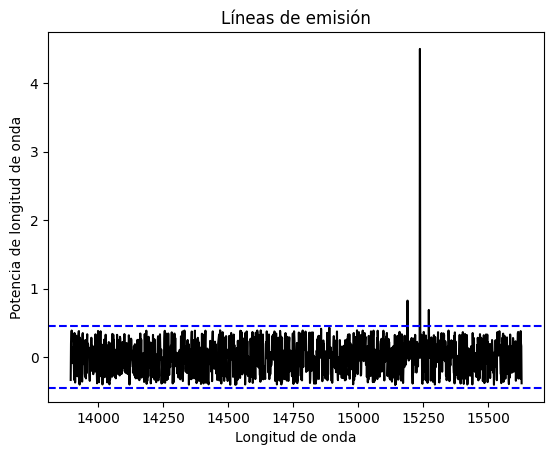

In [89]:
# Desviación estandar del ruido
std_ruido = ruido.std()
n = 2

# Lineas emisión
plt.plot(wlth, obs_1 - media_ruido, color = 'black')

# Margen
plt.axhline(y=n*std_ruido, color = 'blue', linestyle = '--')
plt.axhline(y=-n*std_ruido, color = 'blue', linestyle = '--')

plt.title('Líneas de emisión')
plt.xlabel('Longitud de onda')
plt.ylabel('Potencia de longitud de onda')

plt.show()

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [95]:
data.columns

# Estas columnas no nos interesan, asi que las excluímos.
excluir = ['Wlth', 'Unnamed: 0']

for i in data1:
  # Exclusión de columnas.
  if i in excluir:
    continue

  columna = data1[i]

  # Estadisticas y límites
  media = columna.mean()
  desv_std = columna.std()

  lim_sup = media + 3*desv_std
  lim_inf = media - 3*desv_std

  # Ruido filtrado
  ruido = columna[(columna >= lim_inf) & (columna <= lim_sup)]

  media_ruido = ruido.mean()

  data1[i] = data1[i] - media_ruido

data1



,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,-0.334837,0.048739,0.133701,0.362853,0.201410,-0.223720,-0.217798,-0.285839,...,-0.155063,-0.161301,-0.041081,-0.098143,-0.267710,-0.110412,-0.229588,0.213125,-0.052771,-0.284948
1,1,13894.381791,0.210536,0.384755,-0.354463,0.283881,0.219970,0.294341,0.294168,-0.030236,...,-0.214035,-0.196423,0.109355,0.236468,-0.246610,-0.064916,0.025866,0.120696,0.389733,-0.204204
2,2,13895.604780,0.236594,-0.224127,0.210778,-0.104288,0.199370,0.129416,0.138232,-0.364276,...,0.214896,0.092456,-0.134420,0.237607,-0.073721,-0.049146,0.281783,-0.384137,0.125374,0.004951
3,3,13896.827769,0.387512,-0.147004,-0.072299,-0.385685,0.097323,0.362443,-0.184435,-0.107535,...,-0.159208,0.210652,0.190932,0.055096,-0.273209,0.231390,0.374388,-0.223269,-0.194508,-0.283408
4,4,13898.050759,0.005629,-0.108552,0.123400,0.351261,-0.322103,-0.032836,-0.364873,0.290442,...,-0.394844,-0.282750,-0.309487,0.029362,0.158728,0.082569,0.393471,-0.209000,-0.128977,-0.294620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,-0.314779,0.222278,0.247164,0.103127,0.370664,-0.221073,0.099183,0.052125,...,0.343675,-0.228679,0.391967,-0.364783,-0.303944,-0.183150,-0.180568,0.078666,-0.352263,-0.101966
1416,1416,15624.911694,0.379379,0.332789,0.148880,0.251925,0.327237,-0.021668,-0.113744,0.200203,...,0.170877,-0.278099,0.092207,-0.162676,0.311879,0.169090,0.281288,-0.052506,-0.178051,0.366430
1417,1417,15626.134683,0.200194,-0.085328,-0.127833,0.081110,0.348949,-0.394537,-0.337372,0.045863,...,-0.350369,-0.019294,-0.008765,0.230524,-0.032143,0.307356,0.179316,-0.167737,0.376817,0.149503
1418,1418,15627.357673,0.159943,0.261171,0.304269,-0.057055,0.115973,-0.108359,0.310380,-0.390692,...,-0.179807,-0.369570,0.301771,-0.013142,-0.234453,0.172129,-0.102305,0.355191,-0.251594,0.001100


2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [101]:
excluir = ['Wlth', 'Unnamed: 0']

desv_stndr = []
prom_obs = []

sigma = 0

for i in data1:
  # Exclusión de columnas.
  if i in excluir:
    continue

  columna = data1[i]
  prom_columna = columna.mean()
  prom_obs.append(prom_columna)

  for j in prom_obs:
    sigma += j**2

  sigma = np.sqrt(sigma)
  print(sigma)
  desv_stndr.append(sigma)
  sigma = 0

#desv_stndr


0.003750617230219967
0.0053895083174254795
0.006565466982377297
0.00735499641295598
0.008029813047200553
0.008718042648225992
0.009420588269501484
0.010074183245428334
0.010699967292419286
0.011223945353013184
0.011841879319617657
0.012353499827211286
0.012900127077466697
0.01355528860343061
0.01397204159604555
0.014566074781801285
0.015078734421128153
0.015522140424890828
0.015993399356604293
0.016369052230586108


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:**

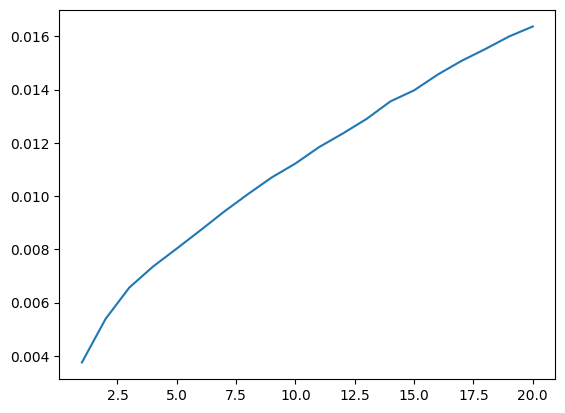

In [105]:
N = np.arange(1,len(prom_obs)+1)

plt.plot(N, desv_stndr)

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:**